Phase 1 

importing libraries
Data loading 
data manipulation(handling missing value,Handle missing values, remove duplicates, and clean inconsistent data entries)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the data set employee_data
data=pd.read_csv("employee_data.csv")

In [3]:
# check the first five occurrences
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [4]:
# Data shape 
data.shape  # row =100 #columns=8

(100, 8)

In [5]:
# Checking for the null value
data.isna().count()

EmployeeID          100
Name                100
Age                 100
Department          100
Salary              100
YearsAtCompany      100
PerformanceScore    100
Attrition           100
dtype: int64

In [6]:
# get the number of total null values
data.isna().sum()  # There are no null value

EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

In [7]:
data.dtypes

EmployeeID           int64
Name                object
Age                  int64
Department          object
Salary               int64
YearsAtCompany       int64
PerformanceScore     int64
Attrition           object
dtype: object

In [8]:
#checking for the duplicates
data.duplicated().sum()   # here no duplicate exist.


np.int64(0)

In [9]:
# checking the columns of the dataset
data.columns

Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany',
       'PerformanceScore', 'Attrition'],
      dtype='object')

In [10]:
# checking for the value containing any inconsistent symbol 
data['Salary']  # it is clean

0     55000
1     60000
2     80000
3     65000
4     75000
      ...  
95    53000
96    91000
97    75000
98    70000
99    87000
Name: Salary, Length: 100, dtype: int64

In [11]:
# Getting the over info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [12]:
# statical value of the data set like mean,median ,mode, min,max for numerical values.
data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [13]:
# re- checking for the data 
data.head(10)

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
5,6,Amy White,25,HR,45000,1,70,No
6,7,Daniel Clark,38,Engineering,95000,12,92,No
7,8,Susan Lewis,32,Marketing,70000,6,82,No
8,9,James Walker,45,Sales,77000,18,84,Yes
9,10,Patricia Hall,29,Engineering,85000,5,90,No


Exploratory data analysis(EDA)


In [14]:
#descriptive statistics like mean, median, mode, variance, and standard deviation for numerical columns.
data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [15]:
# checking the statistics individually.
summary = pd.DataFrame({
    'Mean': data.mean(numeric_only=True),
    'Median': data.median(numeric_only=True),
    'Mode': data.mode(numeric_only=True).iloc[0],
    'Variance': data.var(numeric_only=True),
    'Std_Dev': data.std(numeric_only=True)
})
print(summary)


                      Mean   Median     Mode      Variance       Std_Dev
EmployeeID           50.50     50.5      1.0  8.416667e+02     29.011492
Age                  36.57     35.0     29.0  6.919707e+01      8.318478
Salary            72820.00  72000.0  68000.0  1.598663e+08  12643.823102
YearsAtCompany       10.80     10.0      2.0  4.046465e+01      6.361183
PerformanceScore     84.94     85.5     80.0  4.031960e+01      6.349771


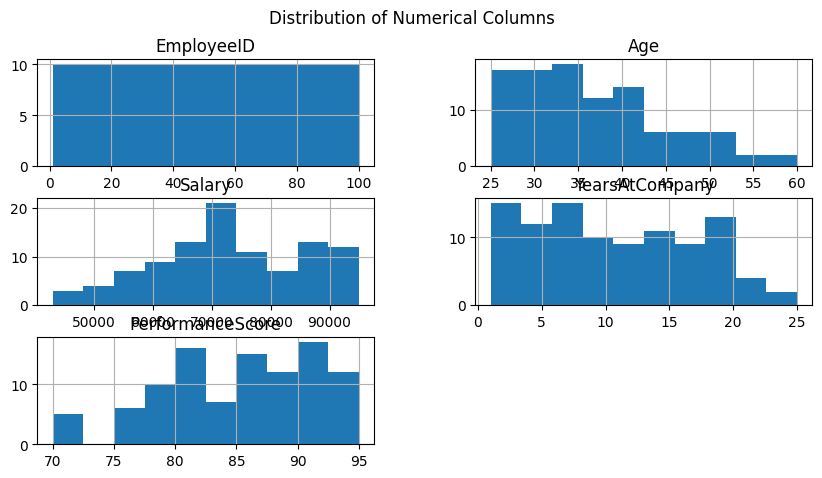

In [16]:
# plot for Distribution of Numerical Columns

data.hist( figsize=(10, 5),bins=10)
plt.suptitle("Distribution of Numerical Columns")
plt.show()


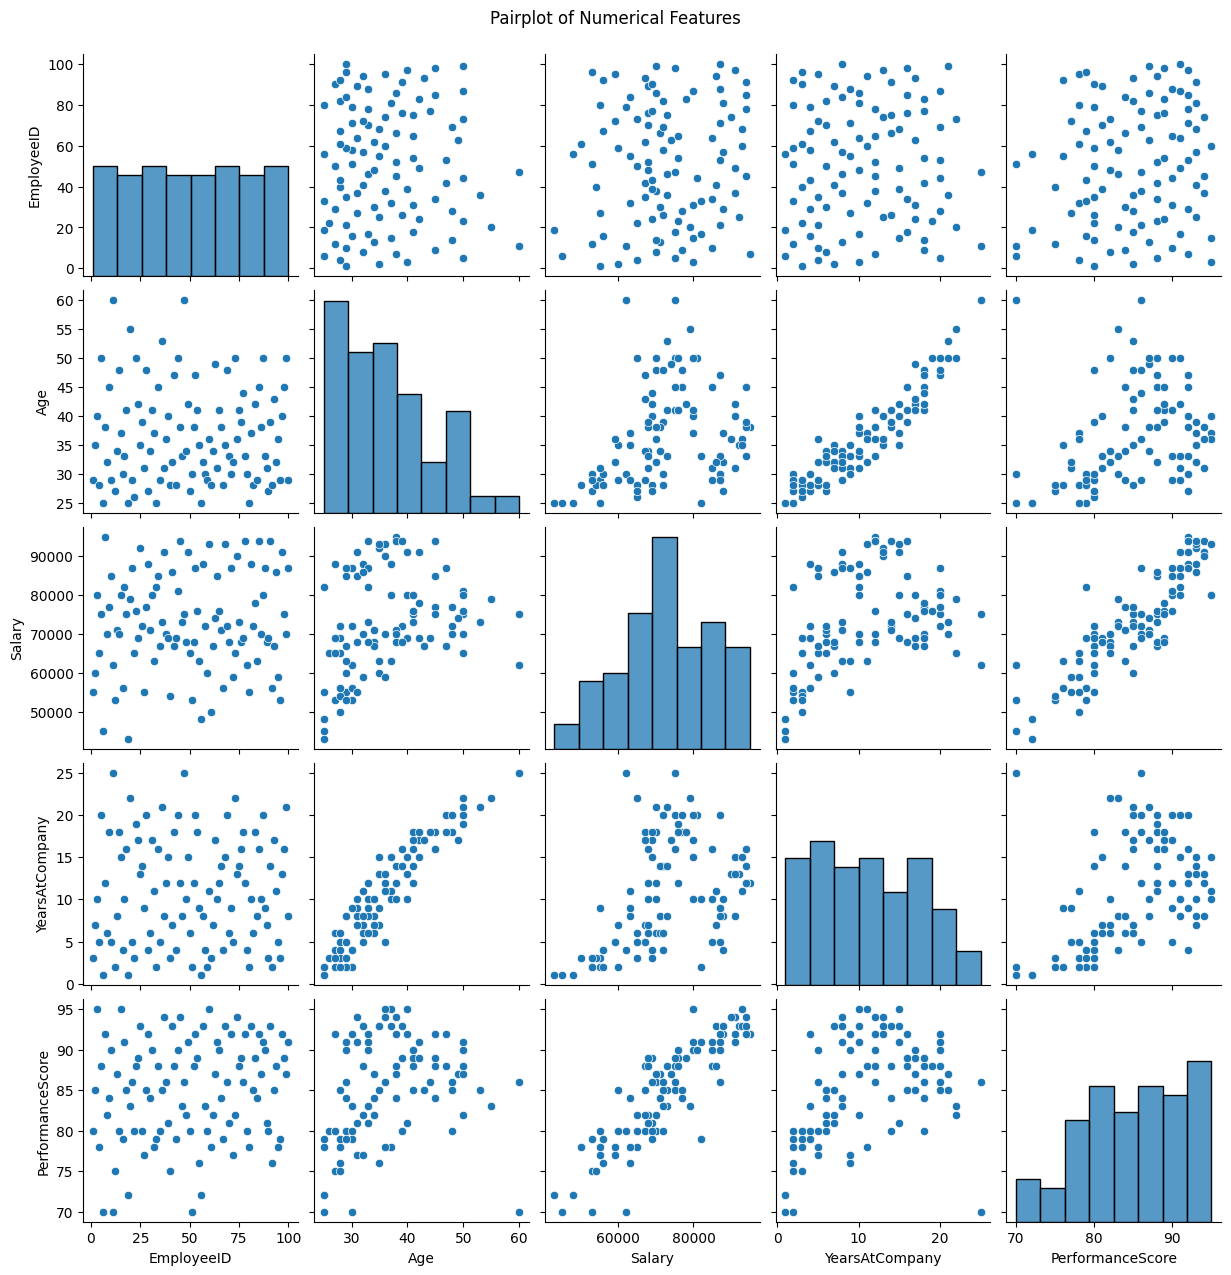

In [17]:
#Pairplot — Explore Relationships Between Features
sns.pairplot(data)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

                  EmployeeID       Age    Salary  YearsAtCompany  \
EmployeeID          1.000000 -0.023041  0.100207        0.021620   
Age                -0.023041  1.000000  0.281416        0.946127   
Salary              0.100207  0.281416  1.000000        0.413361   
YearsAtCompany      0.021620  0.946127  0.413361        1.000000   
PerformanceScore    0.151666  0.305288  0.874773        0.443331   

                  PerformanceScore  
EmployeeID                0.151666  
Age                       0.305288  
Salary                    0.874773  
YearsAtCompany            0.443331  
PerformanceScore          1.000000  


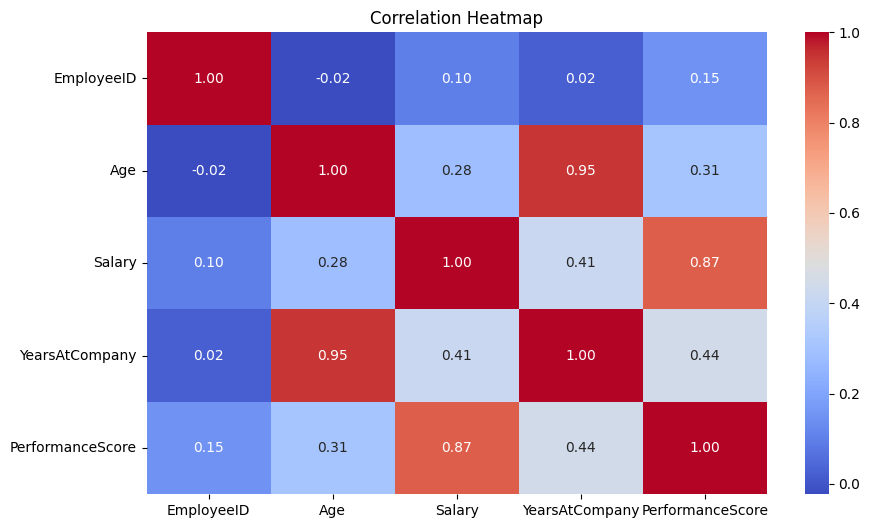

In [18]:
# Heatmap — Correlation Analysis

plt.figure(figsize=(10, 6))
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()   # Form heatmap correaltion analysis we get performanceScore and salary is most correlated



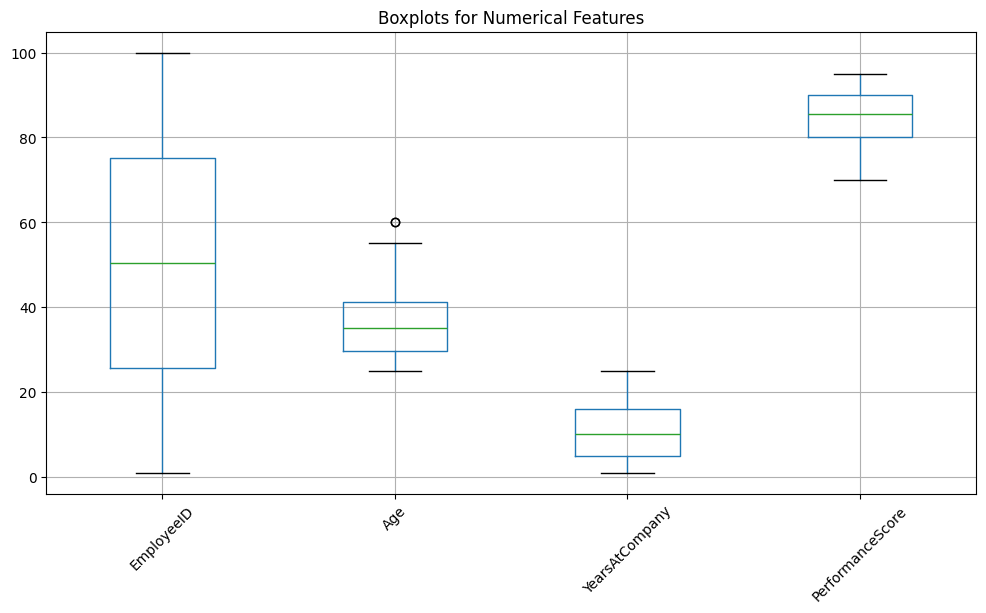

In [19]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols=numeric_cols.drop(['Salary'])   # removed the salary columns be cause it don't giving meaningful insight because of high value compare to the other colums values 
plt.figure(figsize=(12, 6))
data.boxplot(column=list(numeric_cols))
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()      #


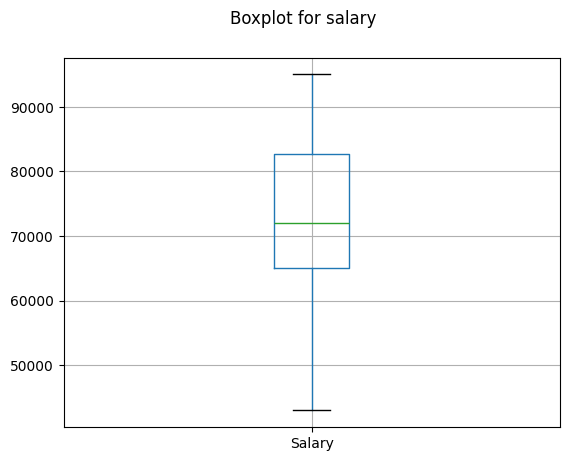

In [20]:
data.boxplot(column=['Salary'])
plt.suptitle('Boxplot for salary')
plt.show()

Probability and Statistical Analysis


In [21]:
# Calculate overall probability of leaving
prob_attrition = (data['Attrition'] == 'Yes').mean()
print(f"Probability of an employee leaving: {prob_attrition:.2f}")


Probability of an employee leaving: 0.39


In [22]:
data['Attrition'].value_counts()

Attrition
No     61
Yes    39
Name: count, dtype: int64

In [23]:
#Conditional Probability by Department
prob_attrition_by_dept = data.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())
print(prob_attrition_by_dept)

Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition, dtype: float64


In [24]:
data['PerformanceScore'].describe()

count    100.000000
mean      84.940000
std        6.349771
min       70.000000
25%       80.000000
50%       85.500000
75%       90.000000
max       95.000000
Name: PerformanceScore, dtype: float64

In [25]:
data['PerformanceCategory'] = pd.cut(
    data['PerformanceScore'],
    bins=[70, 80, 85.5, 90, 95],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)
data['PerformanceCategory'].value_counts()


PerformanceCategory
Low          30
High         26
Very High    24
Medium       20
Name: count, dtype: int64

In [26]:
# this based on all number of employees
prob_attrition_by_perf = data.groupby('PerformanceCategory',observed=True)['Attrition'].apply(lambda x: (x == 'Yes').mean())

print("Probability of Attrition by Performance Level:")
print(prob_attrition_by_perf)


Probability of Attrition by Performance Level:
PerformanceCategory
Low          0.266667
Medium       0.400000
High         0.423077
Very High    0.500000
Name: Attrition, dtype: float64


In [27]:
total_left = data[data['Attrition'] == 'Yes'].shape[0]
print("Total employees who left:", total_left)

Total employees who left: 39


In [28]:
left_counts = data[data['Attrition'] == 'Yes']['PerformanceCategory'].value_counts()
print(left_counts)


PerformanceCategory
Very High    12
High         11
Medium        8
Low           8
Name: count, dtype: int64


In [29]:
prob_perf_given_attrition = left_counts / total_left
print("P(Performance Category | Attrition = Yes):")
print(prob_perf_given_attrition)


P(Performance Category | Attrition = Yes):
PerformanceCategory
Very High    0.307692
High         0.282051
Medium       0.205128
Low          0.205128
Name: count, dtype: float64


C:\Users\sacbook\AppData\Local\Temp\ipykernel_21456\2486114731.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prob_perf_given_attrition.index, y=prob_perf_given_attrition.values, palette='coolwarm')


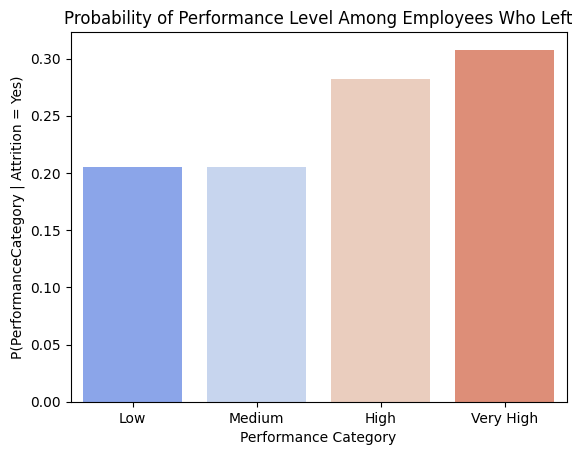

In [30]:
sns.barplot(x=prob_perf_given_attrition.index, y=prob_perf_given_attrition.values, palette='coolwarm')
plt.title("Probability of Performance Level Among Employees Who Left")
plt.xlabel("Performance Category")
plt.ylabel("P(PerformanceCategory | Attrition = Yes)")
plt.show()

In [31]:
# Total counts and probabilities
N_total    = len(data)                                 # total employees
N_left     = (data['Attrition'] == 'Yes').sum()        # total who left
P_left     = N_left / N_total                          # P(Left)

# Counts by performance category (overall and among left)
counts_overall = data['PerformanceCategory'].value_counts().sort_index()
counts_left    = data.loc[data['Attrition'] == 'Yes', 'PerformanceCategory'].value_counts().sort_index()

# Convert to aligned Series (fill missing categories with 0)
all_cats = sorted(list(set(data['PerformanceCategory'].cat.categories) if hasattr(data['PerformanceCategory'], "cat") 
                       else set(data['PerformanceCategory'].unique())))
counts_overall = counts_overall.reindex(all_cats, fill_value=0)
counts_left    = counts_left.reindex(all_cats, fill_value=0)

P_S = counts_overall / N_total          # P(S)
P_S_given_left = counts_left / N_left   # P(S | Left)

# Bayes estimate P(Left | S)
# avoid division by zero for categories with no overall observations
bayes_P_left_given_S = pd.Series(index=all_cats, dtype=float)
for cat in all_cats:
    if P_S.loc[cat] > 0:
        bayes_P_left_given_S.loc[cat] = (P_S_given_left.loc[cat] * P_left) / P_S.loc[cat]
    else:
        bayes_P_left_given_S.loc[cat] = np.nan

# Empirical P(Left | S) (direct)
empirical_P_left_given_S = (counts_left / counts_overall).replace({np.inf: np.nan})

# Build result table
result = pd.DataFrame({
    'N_overall': counts_overall,
    'N_left': counts_left,
    'P(S)': P_S.round(4),
    'P(S|Left)': P_S_given_left.round(4),
    'P(Left)': round(P_left, 4),
    "Bayes P(Left|S)": bayes_P_left_given_S.round(4),
    "Empirical P(Left|S)": empirical_P_left_given_S.round(4)
})

print("Totals: N_total = {}, N_left = {}, P(Left) = {:.4f}".format(N_total, N_left, P_left))
print("\nResult table (by PerformanceCategory):\n")
print(result)


Totals: N_total = 100, N_left = 39, P(Left) = 0.3900

Result table (by PerformanceCategory):

           N_overall  N_left  P(S)  P(S|Left)  P(Left)  Bayes P(Left|S)  \
High              26      11  0.26     0.2821     0.39           0.4231   
Low               30       8  0.30     0.2051     0.39           0.2667   
Medium            20       8  0.20     0.2051     0.39           0.4000   
Very High         24      12  0.24     0.3077     0.39           0.5000   

           Empirical P(Left|S)  
High                    0.4231  
Low                     0.2667  
Medium                  0.4000  
Very High               0.5000  


In [32]:
from scipy.stats import f_oneway
# Group PerformanceScore by Department
groups = [group['PerformanceScore'].values for name, group in data.groupby('Department')]

# Perform ANOVA
F_stat, p_value = f_oneway(*groups)

# Print F-statistic and p-value
print("F-statistic:", F_stat)
print("p-value:", p_value)

# Hypothesis statement and decision
alpha = 0.05  # significance level

print("\nHypothesis:")
print("H0: The mean PerformanceScore is the same across all departments.")
print("Ha: At least one department has a different mean PerformanceScore.\n")

if p_value < alpha:
    print(f"Decision: Reject H0 (p-value = {p_value:.4f} < {alpha})")
    print("Conclusion: There is significant evidence that mean PerformanceScore differs across departments.")
else:
    print(f"Decision: Fail to reject H0 (p-value = {p_value:.4f} ≥ {alpha})")
    print("Conclusion: There is no significant evidence that mean PerformanceScore differs across departments.")


F-statistic: 25.781068086646336
p-value: 2.5591493445552065e-12

Hypothesis:
H0: The mean PerformanceScore is the same across all departments.
Ha: At least one department has a different mean PerformanceScore.

Decision: Reject H0 (p-value = 0.0000 < 0.05)
Conclusion: There is significant evidence that mean PerformanceScore differs across departments.


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

scaler = MinMaxScaler()
data[['Salary', 'PerformanceScore']] = scaler.fit_transform(data[['Salary', 'PerformanceScore']])

label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])  # Yes=1, No=0
data['Department'] = label_encoder.fit_transform(data['Department'])
data['PerformanceCategory']=label_encoder.fit_transform(data['PerformanceCategory'])



In [34]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,PerformanceCategory
0,1,John Doe,29,3,0.230769,3,0.40,0,1
1,2,Jane Smith,35,1,0.326923,7,0.60,0,2
2,3,Michael Brown,40,0,0.711538,10,1.00,1,3
3,4,Emily Davis,28,2,0.423077,5,0.32,0,1
4,5,David Johnson,50,3,0.615385,20,0.72,1,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [36]:
# Step 1: Define features (X) and target (y)
# Assuming Attrition (0 = No, 1 = Yes) is the target variable
X = data[['Age', 'Department', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'PerformanceCategory']]
y = data['Attrition']

# Step 4: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Step 2: Choose a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

model2=LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [38]:
# Step 3: Make predictions
y_pred = model.predict(X_test)
y2_pred = model2.predict(X_test)

In [39]:
# Step 7: Evaluate the model(random forest model)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Model Evaluation Metrics of Random Forest Model:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# for logistic regression
# Step 7: Evaluate the model
accuracy2 = accuracy_score(y_test, y2_pred)
precision2 = precision_score(y_test, y2_pred, zero_division=0)
recall2 = recall_score(y_test, y2_pred, zero_division=0)
f12 = f1_score(y_test, y2_pred, zero_division=0)

print("Model Evaluation Metrics of logisctic regression:")
print(f"Accuracy:  {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall:    {recall2:.4f}")
print(f"F1-Score:  {f12:.4f}")

Model Evaluation Metrics of Random Forest Model:
Accuracy:  0.7000
Precision: 0.5714
Recall:    0.5714
F1-Score:  0.5714
Model Evaluation Metrics of logisctic regression:
Accuracy:  0.6500
Precision: 0.5000
Recall:    0.4286
F1-Score:  0.4615


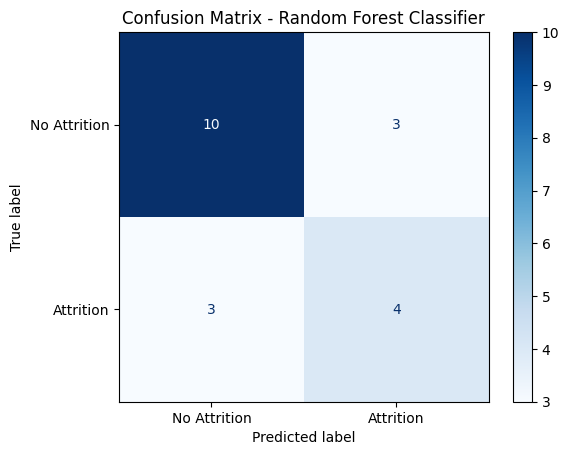

In [40]:
# Step 8: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()



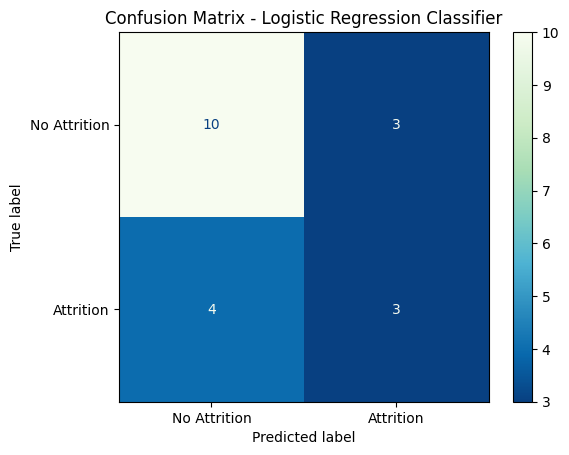

In [41]:
# For Logistic Regression
cm2 = confusion_matrix(y_test, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["No Attrition", "Attrition"])
disp.plot(cmap='GnBu_r')
plt.title("Confusion Matrix - Logistic Regression Classifier")
plt.show()


In [42]:
# Importing library for performance prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Step 2: Select features (independent variables) and target (dependent variable)
# We'll use numerical predictors only to avoid encoding complexity for now
X1 = data[['Age', 'Salary', 'YearsAtCompany']]
y1 = data['PerformanceScore']


In [44]:
# Step 2: Split dataset into Training and Testing sets (80-20 ratio)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [45]:
# Step 3: Build and train Linear Regression model
model3 = LinearRegression()
model3.fit(X1_train, y1_train)


LinearRegression()

In [46]:
# Step 4: Predicting  on test set
y3_pred=model3.predict(X1_test)

In [47]:
# Step 5: Evaluate model performance
mse = mean_squared_error(y1_test, y3_pred)
r2 = r2_score(y1_test, y3_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0185
R-squared (R²): 0.7737


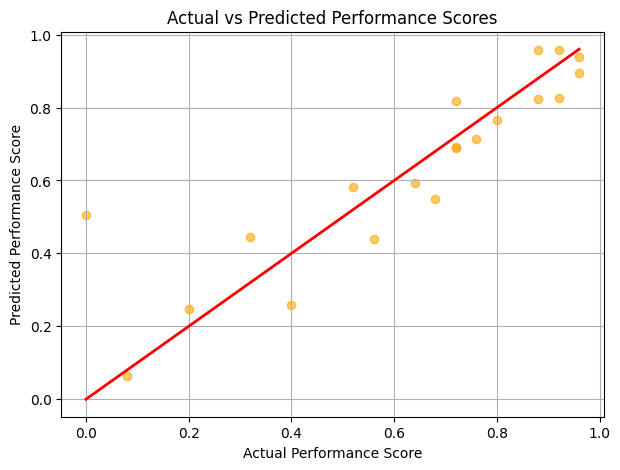

In [48]:
# Step 6: Visualize Actual vs Predicted Performance Scores
plt.figure(figsize=(7,5))
plt.scatter(y1_test, y3_pred, color='Orange', alpha=0.6)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()],color='red', linewidth=2)
plt.title("Actual vs Predicted Performance Scores")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.grid(True)
plt.show()


In [49]:
# Step 7: View model coefficients
coeff_df = pd.DataFrame(model3.coef_, X1.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)


Model Coefficients:
                Coefficient
Age               -0.003606
Salary             0.814429
YearsAtCompany     0.011280


Phase  3(deep learning)

In [50]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,PerformanceCategory
0,1,John Doe,29,3,0.230769,3,0.40,0,1
1,2,Jane Smith,35,1,0.326923,7,0.60,0,2
2,3,Michael Brown,40,0,0.711538,10,1.00,1,3
3,4,Emily Davis,28,2,0.423077,5,0.32,0,1
4,5,David Johnson,50,3,0.615385,20,0.72,1,0


In [51]:
# Importing the libraries.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [52]:
# Select input and output features
X = data[['Age', 'Salary', 'YearsAtCompany', 'Department']]  # independent variables
y = data['PerformanceScore']  # dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
# Build the neural network model
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  # output layer (for regression)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=8, verbose=1)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Epoch 1/100


C:\Users\sacbook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 11.0064 - val_loss: 0.0921
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1768 - val_loss: 0.1370
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1515 - val_loss: 0.1380
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1027 - val_loss: 0.1035
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0869 - val_loss: 0.0871
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0634 - val_loss: 0.0555
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0524 - val_loss: 0.0296
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0514 - val_loss: 0.0307
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0522 - val_loss: 0.0328
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0419 - val_loss: 0.0365
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0435 - val_loss: 0.0305
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0415 - val_loss: 0.0286


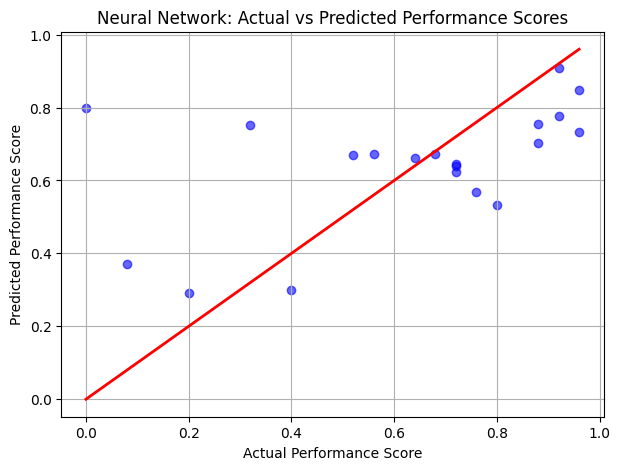

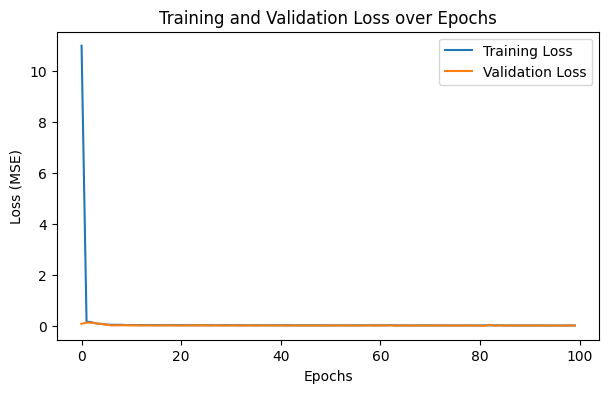

In [54]:
# Visualize Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.title("Neural Network: Actual vs Predicted Performance Scores")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.grid(True)
plt.show()

# Visualize training progress
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [55]:


# Input features and target
X = data[['Age', 'Department', 'Salary', 'YearsAtCompany', 'PerformanceScore']]
y = data['Attrition']   # 0 = No, 1 = Yes

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build Neural Network
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100, batch_size=8, verbose=1)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\nModel Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")



Epoch 1/100


C:\Users\sacbook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6094 - loss: 0.7218 - val_accuracy: 0.5000 - val_loss: 0.7309
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5625 - loss: 0.7015 - val_accuracy: 0.5000 - val_loss: 0.7207
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 0.6936 - val_accuracy: 0.5625 - val_loss: 0.7189
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6094 - loss: 0.6848 - val_accuracy: 0.5625 - val_loss: 0.7138
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6094 - loss: 0.6802 - val_accuracy: 0.5625 - val_loss: 0.7095
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5781 - loss: 0.6690 - val_accuracy: 0.5625 - val_loss: 0.7015
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6406 - loss: 0.6662 - val_accuracy: 0.5625 - val_loss: 0.7016
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6094 - loss: 0.6600 - val_accuracy: 0.6250 - val_loss: 0.6980
Epoch

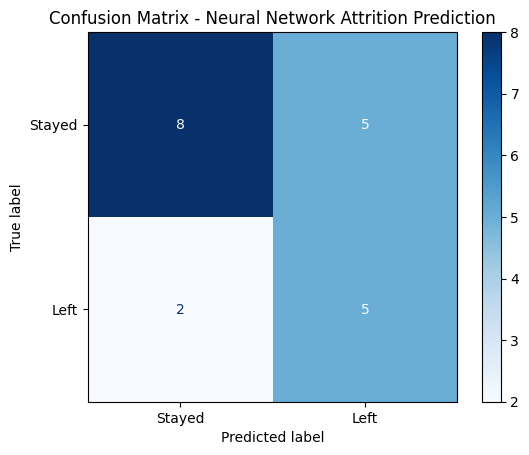

In [56]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Neural Network Attrition Prediction")
plt.show()



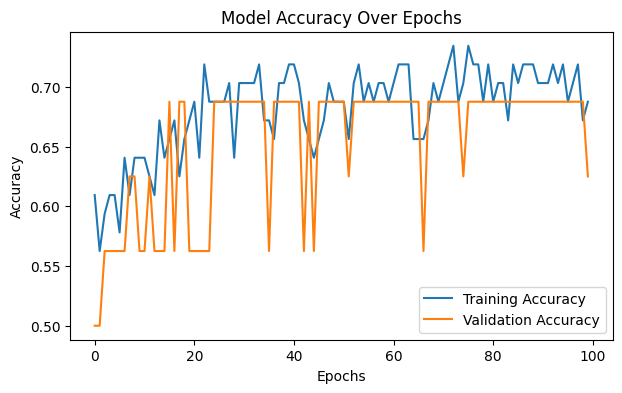

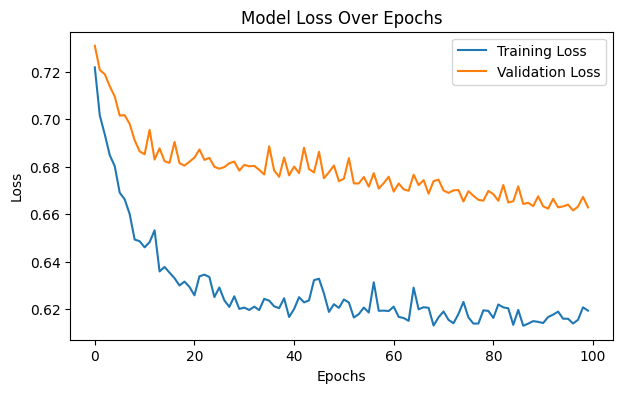

In [57]:
# Training history visualization
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


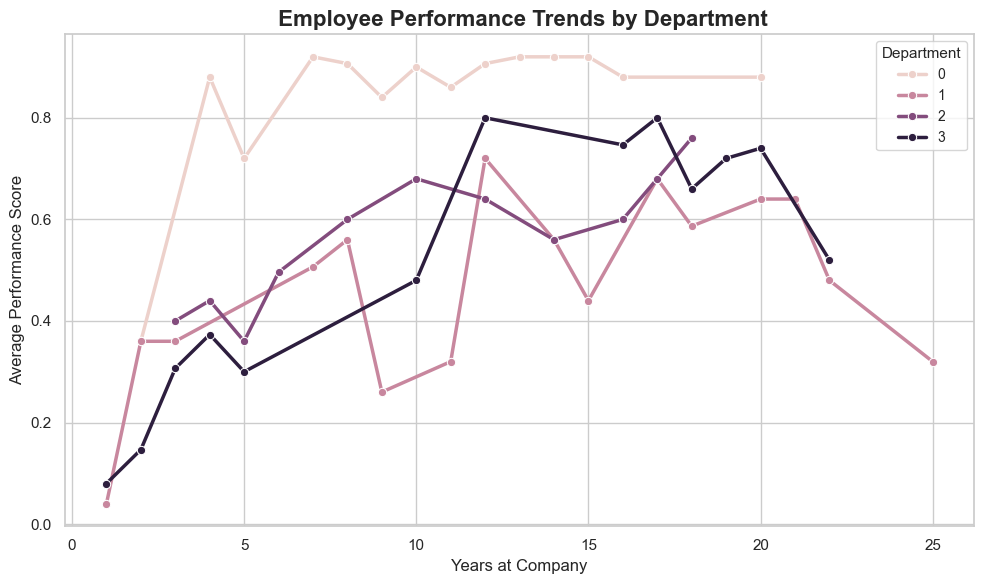

In [58]:
# Group data: average performance per department per year
perf_trend = (
    data.groupby(['Department', 'YearsAtCompany'])['PerformanceScore']
      .mean()
      .reset_index()
)

# Set plot style
sns.set(style="whitegrid")

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=perf_trend,
    x='YearsAtCompany',
    y='PerformanceScore',
    hue='Department',
    marker='o',
    linewidth=2.5
)

# Customize the chart
plt.title(" Employee Performance Trends by Department", fontsize=16, weight='bold')
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Average Performance Score", fontsize=12)
plt.legend(title="Department", title_fontsize=11, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [60]:
data

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,PerformanceCategory
0,1,John Doe,29,3,0.230769,3,0.40,0,1
1,2,Jane Smith,35,1,0.326923,7,0.60,0,2
2,3,Michael Brown,40,0,0.711538,10,1.00,1,3
3,4,Emily Davis,28,2,0.423077,5,0.32,0,1
4,5,David Johnson,50,3,0.615385,20,0.72,1,0
...,...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,1,0.192308,3,0.36,0,1
96,97,Thomas Harris,40,0,0.923077,13,0.88,1,3
97,98,Michael Lewis,45,3,0.615385,16,0.76,0,0
98,99,Linda Young,50,1,0.519231,21,0.68,1,0
